<a href="https://colab.research.google.com/github/muthiawidya/Try-Machine-Learning/blob/main/Cabutlah_Contoh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv
import folium
import geopy

In [ ]:
df = pd.read_csv('/content/Restaurant.csv')

df.head()

,nama,type,latitude,longitude
0,Warung pisang Gapit,Restaurant,-2.521507,112.968045
1,Warung terapung pisang gapit,Restaurant,-2.521463,112.967875
2,Warung Pencok LINA,Restaurant,-2.520830,112.968474
3,D'Layar Resto SAMPIT,Restaurant,-2.518627,112.970164
4,Rumah makan batu mandi sampit kotawaringin timur,Restaurant,-2.518115,112.970210


In [ ]:
df.isnull().sum().sort_values(ascending=False).head()

longitude    0
latitude     0
type         0
nama         0
dtype: int64

In [ ]:
X=df.loc[:,['nama','latitude','longitude']]
X.head()

,nama,latitude,longitude
0,Warung pisang Gapit,-2.521507,112.968045
1,Warung terapung pisang gapit,-2.521463,112.967875
2,Warung Pencok LINA,-2.520830,112.968474
3,D'Layar Resto SAMPIT,-2.518627,112.970164
4,Rumah makan batu mandi sampit kotawaringin timur,-2.518115,112.970210


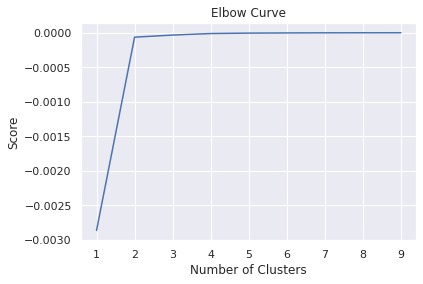

In [ ]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = df[['latitude']]
X_axis = df[['longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]

plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3, init ='k-means++')
kmeans.fit(X[X.columns[1:3]]) 
X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])
centers = kmeans.cluster_centers_ 
labels = kmeans.predict(X[X.columns[1:3]]) 
X.head(10)

,nama,latitude,longitude,cluster_label
0,Warung pisang Gapit,-2.521507,112.968045,1
1,Warung terapung pisang gapit,-2.521463,112.967875,1
2,Warung Pencok LINA,-2.520830,112.968474,1
3,D'Layar Resto SAMPIT,-2.518627,112.970164,1
4,Rumah makan batu mandi sampit kotawaringin timur,-2.518115,112.970210,1
5,RM. Jolodong Ikan Bakar,-2.518024,112.970451,1
6,RM BATU MANDI,-2.517922,112.970247,1
7,Warung Makan Jolodong,-2.517863,112.970529,1
8,Dapur acil Titin,-2.517166,112.971028,1
9,Ayam Bakar Wong Solo,-2.539433,112.957959,0


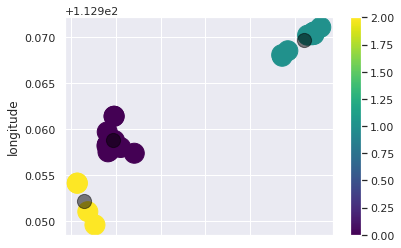

In [ ]:
X.plot.scatter(x = 'latitude', y = 'longitude', c=labels, s=400, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [ ]:
type = "Restaurant"

locator = geopy.geocoders.Nominatim(user_agent="MyCoder")
location = locator.geocode(type)
print(location)

location = [location.latitude, location.longitude]
print("[lat, long]:", location)

NameError: ignored